In [2]:
from numpy.linalg import svd
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt

In [116]:
def normalize_image(image):
    min_val = np.min(image, axis=(0, 1), keepdims=True)
    max_val = np.max(image, axis=(0, 1), keepdims=True)
    normalized_image = (image - min_val) / (max_val - min_val)
    return normalized_image

In [3]:
fpath = '/Users/admin/Documents/2020-09-09/JINST_SVD/gssti-project-nk/sim_gal/'

In [25]:
# def circular_mask(d):
#     ny, nx = d.shape[:-1] if d.ndim == 3 else d.shape
#     c = ny / 2 - 1
#     ix, iy = np.meshgrid(np.arange(nx), np.arange(ny))
#     distance = np.sqrt((ix - c) ** 2 + (iy - c) ** 2)
#     d[..., distance > c] = np.nan
#     return d

def circular_mask(d):
    if d.ndim == 3:
        ny, nx, _ = d.shape
    else:
        ny, nx = d.shape
    c = ny / 2 - 3
    print(c)
    ix, iy = np.meshgrid(np.arange(nx), np.arange(ny))
    distance = np.sqrt((ix - c) ** 2 + (iy - c) ** 2)
    if d.ndim == 3:
        d = d.astype(float)  # Convert to floating-point type
        d[distance > c, :] = np.nan
    else:
        d = d.astype(float)  # Convert to floating-point type
        d[distance > c] = np.nan
    return d

In [117]:

# Define the target shape
target_shape = (128, 128)  # Change this to your desired shape

# Initialize an empty list to store resized images
resized_images = []

# Use glob to find all .png files in the directory
png_files = glob.glob(f'{fpath}' +'*.png')

# Loop through each .png file
for png_file in png_files:
    # Read the image using OpenCV
    img = cv2.imread(png_file)
    # Resize the image to the target shape
    resized_img = cv2.resize(img, target_shape)
    resized_img = normalize_image(image=resized_img)
    print(resized_img.shape)
#     masked_arr = circular_mask(d=resized_img)
#     masked_arr = np.where(resized_img == 0, np.nan, resized_img)
    # Append the resized image to the list
    resized_images.append(resized_img)
#     resized_images.append(masked_arr)
    

# Concatenate the resized images horizontally
appended_image = np.hstack(resized_images)

# # Display or save the appended image
# cv2.imshow('Appended Image', appended_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# # If you want to save the appended image to a file
# # cv2.imwrite('appended_image.png', appended_image)

# # Display the appended image inline in Jupyter Notebook
# plt.figure(figsize=(15, 10), dpi=300)  # Set figure size and dpi
# plt.imshow(cv2.cvtColor(appended_image, cv2.COLOR_BGR2RGB))
# plt.axis('off')  # Turn off axis
# plt.show()

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


In [36]:
np.array(resized_images).shape

(10, 128, 128, 3)

In [37]:
appended_image.shape

(128, 1280, 3)

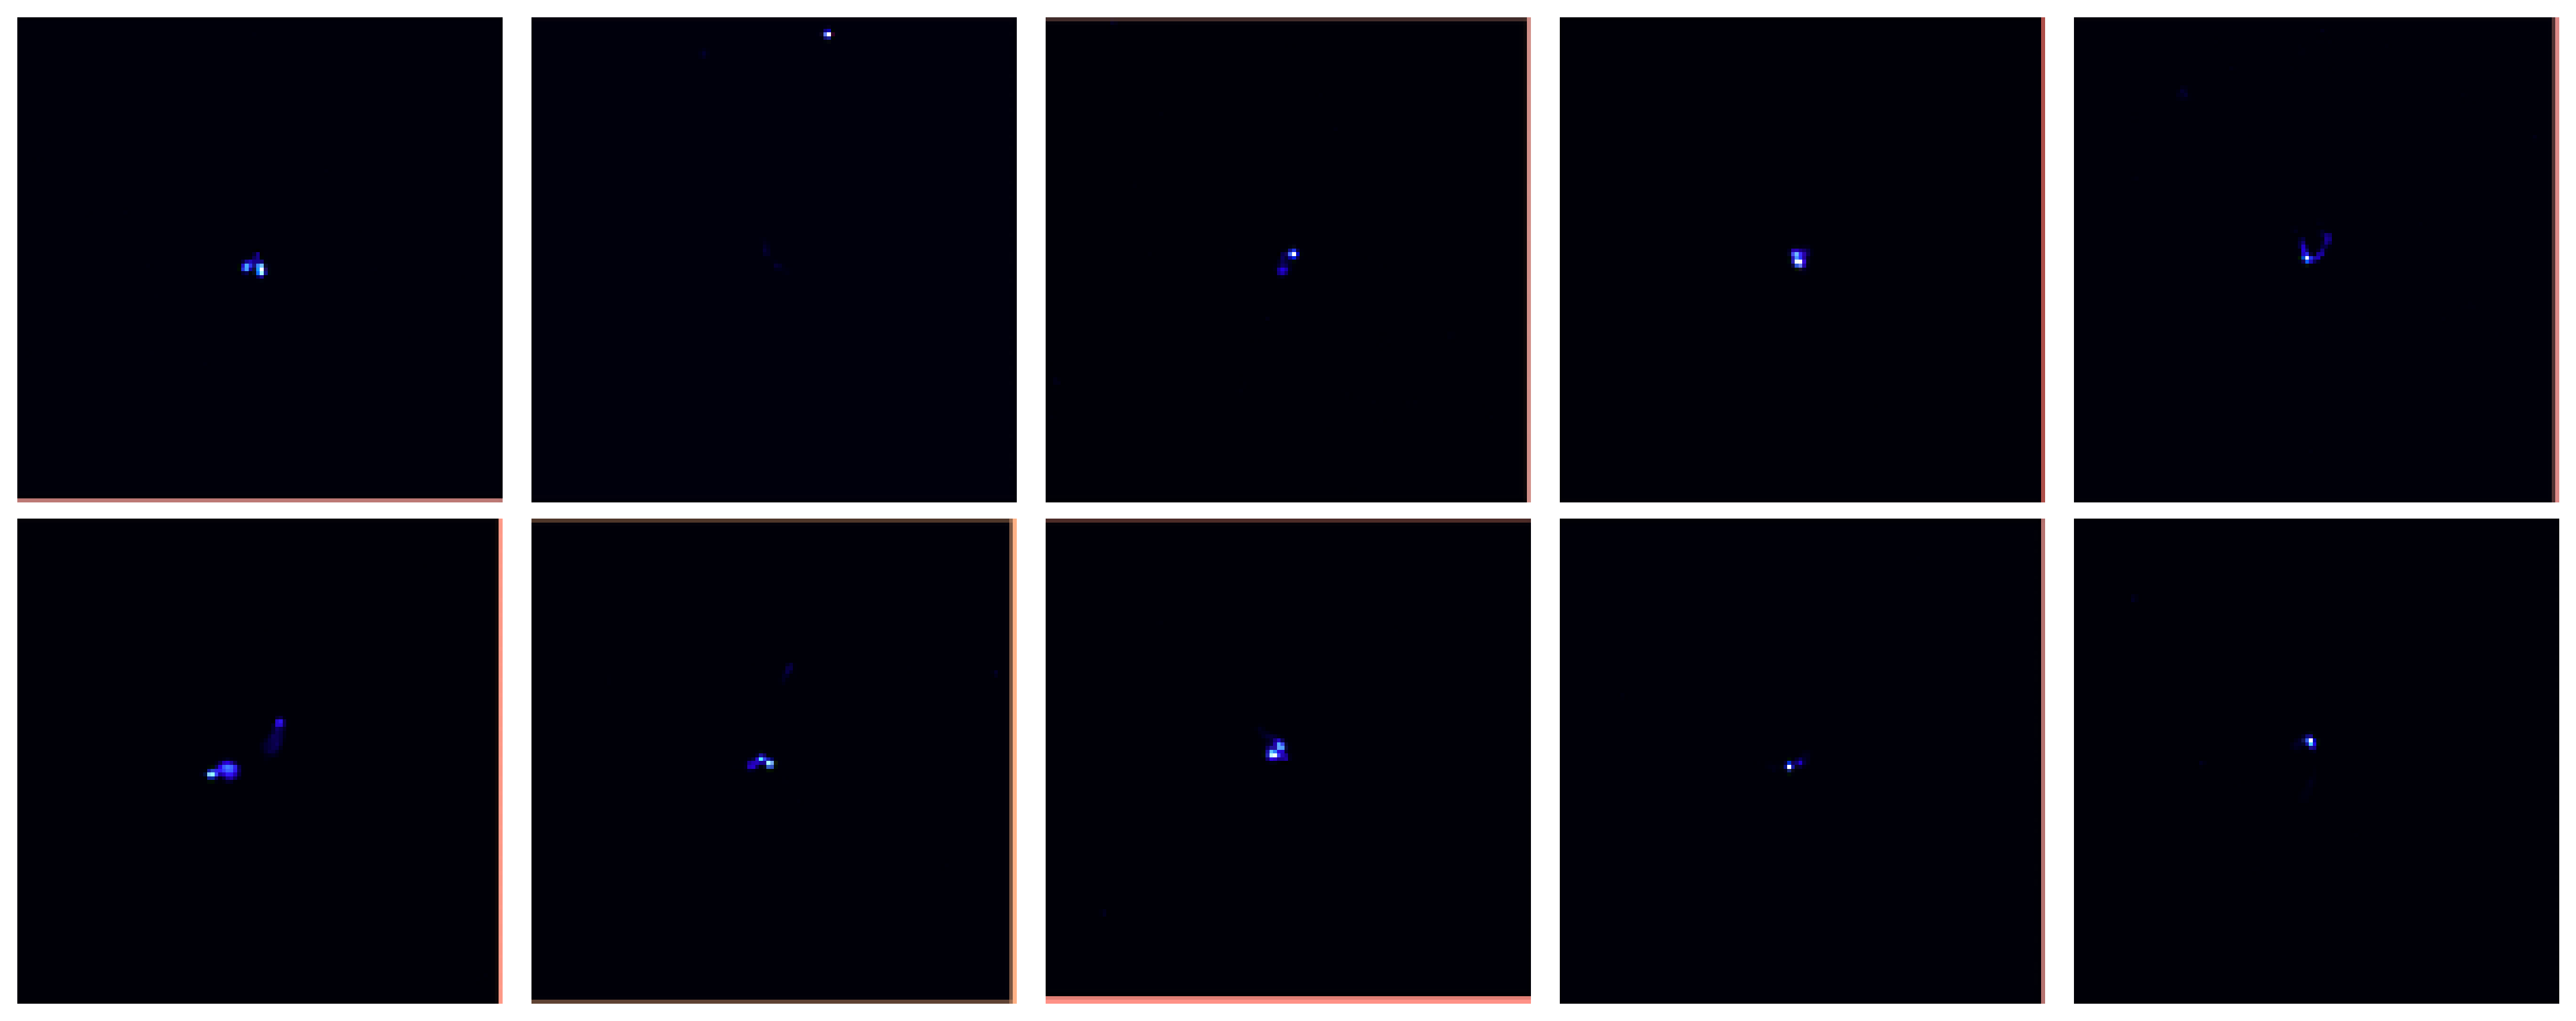

In [118]:
# Create a figure and a grid of subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6), dpi=300)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through masked_arr_listeach subplot and plot the corresponding masked image
for i, masked_arr in enumerate(resized_images):
    ax = axes[i]
    ax.imshow(masked_arr, cmap='cubehelix')
    ax.axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

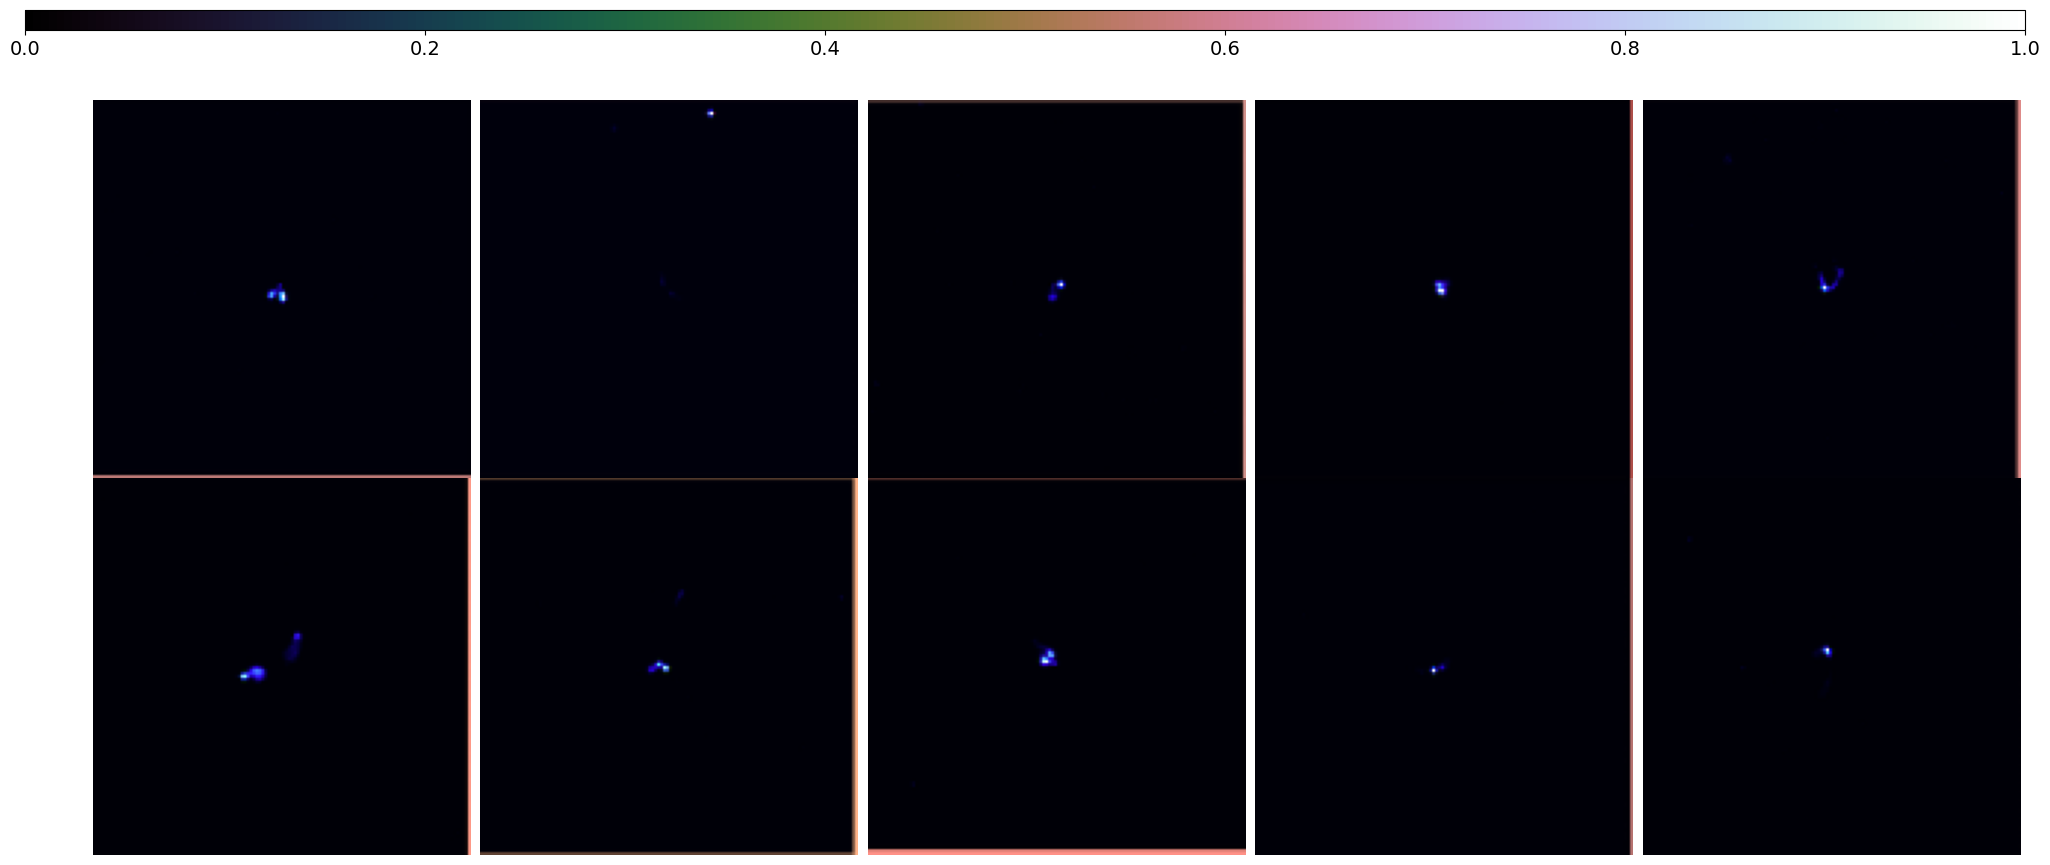

In [120]:
# Concatenate all resized images into a single array
all_images = np.concatenate(resized_images, axis=0)

# Get the minimum and maximum values from all the images
min_val = np.min(all_images)
max_val = np.max(all_images)

# Create a figure and a grid of subplots
fig, axes = plt.subplots(2, 5, figsize=(25, 10), dpi=100)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each subplot and plot the corresponding masked image
for i, masked_arr in enumerate(resized_images):
    ax = axes[i]
    im = ax.imshow(masked_arr, cmap='cubehelix', vmin=min_val, vmax=max_val)
    ax.axis('off')

# Add colorbar directly above the subplots
cbar_ax = fig.add_axes([0.1, 0.95, 0.8, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  # Adjust colorbar tick label size if needed

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.0, hspace=0.0)

# Show the plot
plt.show()

In [58]:
np.array(resized_images).shape

(10, 128, 128, 3)

In [121]:
# def svdecom(data):
#     t1 = time.time()
#     data = np.nan_to_num(data)
#     nchan = data.shape[0]
#     U = np.zeros((2,2,nchan,nchan), dtype='complex')
#     S = np.zeros((2,2,nchan), dtype='complex')
#     npix = data.shape[3]*data.shape[4]
#     V = np.zeros((2,2,nchan,npix), dtype='complex')
#     for i in range(2):
#         for j in range(2):
#             print i,j
#             data2d = np.zeros((nchan,npix), dtype='complex')
#             for k in range(nchan):
#                 data2d[k,:] = data[k,i,j,:,:].ravel()
#             (u,s,v) = svd(data2d, full_matrices=False)
#             U[i,j,:,:], S[i,j,:], V[i,j,:,:] = u,s,v
#     t2 = time.time()
#     print "-- Time taken = %.2f minutes"%((t2-t1)/60.)
#     return U,S,V

In [122]:
# stacked_images = np.array(resized_images)

def svdecom(data):
    
    data = np.array(data)
    nchan, sx, sy, c = data.shape
    # Reshape the stacked images to (nchan, sx*sy*c)
    reshaped_images = data.reshape(nchan, -1)

    # Initialize lists to store the SVD results
    U_list = []
    S_list = []
    V_list = []

    # Compute SVD for each stacked image
    for img in reshaped_images:
        img_2d = img.reshape(sx*sy, c)  # Reshape to 2D
        U, S, V = svd(img_2d, full_matrices=False)
        U_list.append(U)
        S_list.append(S)
        V_list.append(V)

    # Convert the lists to numpy arrays
    U_array = np.array(U_list)
    S_array = np.array(S_list)
    V_array = np.array(V_list)

    # Check the shapes of U, S, and V arrays
    print("U array shape:", U_array.shape)
    print("S array shape:", S_array.shape)
    print("V array shape:", V_array.shape)
    
    return U_array, S_array, V_array 

In [123]:
U, S, V = svdecom(data=resized_images)

U array shape: (10, 16384, 3)
S array shape: (10, 3)
V array shape: (10, 3, 3)


In [124]:
S

array([[12.12581134,  4.89157872,  1.04289203],
       [ 6.58459657,  1.53803738,  0.18256674],
       [13.82731623,  3.76267203,  0.38201229],
       [ 9.86935131,  4.10989868,  0.97415265],
       [14.46994194,  4.69842988,  0.55888353],
       [15.09487208,  5.05465927,  0.90770653],
       [18.50686798,  4.3859073 ,  0.82215435],
       [20.02662519,  4.38167583,  1.07713459],
       [11.15474541,  3.7798326 ,  0.36894229],
       [ 4.40581465,  1.53559769,  0.3470903 ]])

In [271]:
def reconstruct_data(data, U_array, S_array, V_array, threshold):
    nchan, _, _ = U_array.shape
    _, sx, sy, c = data.shape
    # Initialize lists to store reconstructed data and MSE
    model_data = []
    mse = []
    weights = []

    # Reconstruct data for each channel
    for i in range(nchan):
        # Determine the number of singular values to keep based on threshold
        total_energy = np.sum(S_array[i]**2)
        cumulative_energy = np.cumsum(S_array[i]**2)
        idx = np.argmax(cumulative_energy / total_energy >= threshold)
        num_singular_values = idx + 1

        # Truncate U, S, and V matrices
        U_trunc = U_array[i, :, :num_singular_values]
        S_trunc = np.diag(S_array[i][:num_singular_values])
        V_trunc = V_array[i, :num_singular_values, :]

        # Reconstruct data
        reconstructed_img = np.dot(U_trunc, np.dot(S_trunc, V_trunc))
        model_data.append(normalize_image(image=reconstructed_img.reshape((sx, sy, c))))

        # Calculate MSE
        mse.append(np.mean((data[i] - normalize_image(image=reconstructed_img.reshape((sx, sy, c)))) ** 2))

        # Calculate weights
        weights.append(S_array[i][:num_singular_values] / np.sum(S_array[i]))

    return np.array(model_data), mse, weights

# Example usage
# Assuming 'data' is your input image data of shape (10, 128, 128, 3)
data=np.array(resized_images)
U_array, S_array, V_array = svdecom(data)
model_data, mse, weights = reconstruct_data(data, U_array, S_array, V_array, threshold=0.95)

U array shape: (10, 16384, 3)
S array shape: (10, 3)
V array shape: (10, 3, 3)


In [272]:
model_data.shape

(10, 128, 128, 3)

In [273]:
mse

[9.612153816629442e-05,
 6.839328913784754e-07,
 9.72868105582186e-05,
 0.00018088271653648132,
 0.000169049903708291,
 0.0004120393806115424,
 0.0003498193148227765,
 0.0010629700729945886,
 9.222013951563298e-05,
 3.193557635175033e-06]

In [275]:
weights

[array([0.67140764, 0.2708473 ]),
 array([0.79282811, 0.18518967]),
 array([0.76938103, 0.209363  ]),
 array([0.66000706, 0.27484706]),
 array([0.73350001, 0.23816947]),
 array([0.71684958, 0.24004379]),
 array([0.78038891, 0.18494288]),
 array([0.78580667]),
 array([0.72890062, 0.24699105]),
 array([0.70061426, 0.24419131])]

In [270]:
def plot_subplots(original_data, model_data, residuals):
    fig, axes = plt.subplots(3, 4, figsize=(16, 12))

    for i in range(4):
        print(original_data[i].max(), model_data[i].max())
        # Plot original data
        axes[0, i].imshow(original_data[i])
        axes[0, 0].set_ylabel('Original', fontsize=12)
        axes[0, i].set_title(f"Image {i+1}")
        axes[0, i].set_xticks([])
        axes[0, i].set_yticks([])

        # Plot model data
        axes[1, i].imshow(model_data[i])
        axes[1, 0].set_ylabel('Model', fontsize=12)
        axes[1, i].set_xticks([])
        axes[1, i].set_yticks([])

        # Plot residuals
        axes[2, i].imshow(residuals[i] / np.max(np.abs(residuals[i]))) 
        axes[2, 0].set_ylabel('Residual', fontsize=12)
        axes[2, i].set_xticks([])
        axes[2, i].set_yticks([])

    # Add colorbars
    cbar_original = fig.colorbar(axes[0, 3].imshow(original_data[0]), ax=axes[0, 3], location='right')
    cbar_original.set_label('Original Data', rotation=270, labelpad=10)

    cbar_model = fig.colorbar(axes[1, 3].imshow(model_data[0]), ax=axes[1, 3], location='right')
    cbar_model.set_label('Model Data', rotation=270, labelpad=10)

    cbar_residual = fig.colorbar(axes[2, 3].imshow(residuals[0]), ax=axes[2, 3], location='right')
    cbar_residual.set_label('Residual', rotation=270, labelpad=10)

    plt.tight_layout()
    plt.show()

# Example usage
# Assuming 'original_data', 'model_data', and 'residuals' are lists of images corresponding to the original data, model data, and residuals respectively
# plot_subplots(original_data, model_data, residuals)


In [248]:
import numpy as np
import matplotlib.pyplot as plt

def plot_subplotss(original_data, model_data, residuals):
    fig, axes = plt.subplots(3, 4, figsize=(16, 12), constrained_layout=True)

    for i in range(4):
        # Plot original data
        axes[0, i].imshow(original_data[i])
        if i == 0:
            axes[0, i].set_ylabel('Original', fontsize=12)
        axes[0, i].set_title(f"Image {i+1}")
        axes[0, i].set_xticks([])
        axes[0, i].set_yticks([])

        # Plot model data
        axes[1, i].imshow(model_data[i])
        if i == 0:
            axes[1, i].set_ylabel('Model', fontsize=12)
        axes[1, i].set_xticks([])
        axes[1, i].set_yticks([])

        # Plot residuals
        axes[2, i].imshow(residuals[i] / np.max(np.abs(residuals[i]))) 
        if i == 0:
            axes[2, i].set_ylabel('Residual', fontsize=12)
        axes[2, i].set_xticks([])
        axes[2, i].set_yticks([])

    # Add colorbars
    cbar_original = fig.colorbar(axes[0, 3].imshow(original_data[0]), ax=axes[0, :], location='right')
    cbar_original.set_label('Original Data', rotation=270, labelpad=10)

    cbar_model = fig.colorbar(axes[1, 3].imshow(model_data[0]), ax=axes[1, :], location='right')
    cbar_model.set_label('Model Data', rotation=270, labelpad=10)

    cbar_residual = fig.colorbar(axes[2, 3].imshow(residuals[0]), ax=axes[2, :], location='right')
    cbar_residual.set_label('Residual', rotation=270, labelpad=10)

#     plt.tight_layout()
    plt.show()

# Example usage
# Assuming 'original_data', 'model_data', and 'residuals' are lists of images corresponding to the original data, model data, and residuals respectively
# plot_subplots(original_data, model_data, residuals)


In [258]:
import numpy as np
import matplotlib.pyplot as plt

def plot_subplotsq(original_data, model_data, residuals):
    fig, axes = plt.subplots(3, 4, figsize=(16, 12), constrained_layout=True, sharex='col', sharey='row')

    for i in range(4):
        # Plot original data
        im_orig = axes[0, i].imshow(original_data[i])
        if i == 0:
            axes[0, i].set_ylabel('Original', fontsize=12)
        axes[0, i].set_title(f"Image {i+1}")

        # Plot model data
        im_model = axes[1, i].imshow(model_data[i])
        if i == 0:
            axes[1, i].set_ylabel('Model', fontsize=12)

        # Plot residuals
        im_res = axes[2, i].imshow(residuals[i] / np.max(np.abs(residuals[i]))) 
        if i == 0:
            axes[2, i].set_ylabel('Residual', fontsize=12)

    # Add colorbars
    cbar_original = fig.colorbar(im_orig, ax=axes[0, :], location='right')
    cbar_original.set_label('Original Data', rotation=270, labelpad=10)

    cbar_model = fig.colorbar(im_model, ax=axes[1, :], location='right')
    cbar_model.set_label('Model Data', rotation=270, labelpad=10)

    cbar_residual = fig.colorbar(im_res, ax=axes[2, :], location='right')
    cbar_residual.set_label('Residual', rotation=270, labelpad=10)

    plt.show()

# Example usage
# Assuming 'original_data', 'model_data', and 'residuals' are lists of images corresponding to the original data, model data, and residuals respectively
# plot_subplots(original_data, model_data, residuals)


In [259]:
# Generate 4 random numbers from a range of 10
idx = np.random.choice(10, 4, replace=False)
idx

array([9, 8, 7, 2])

In [260]:
od = data[idx] 
md = model_data[idx]
res = od - md

In [261]:
res.shape

(4, 128, 128, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


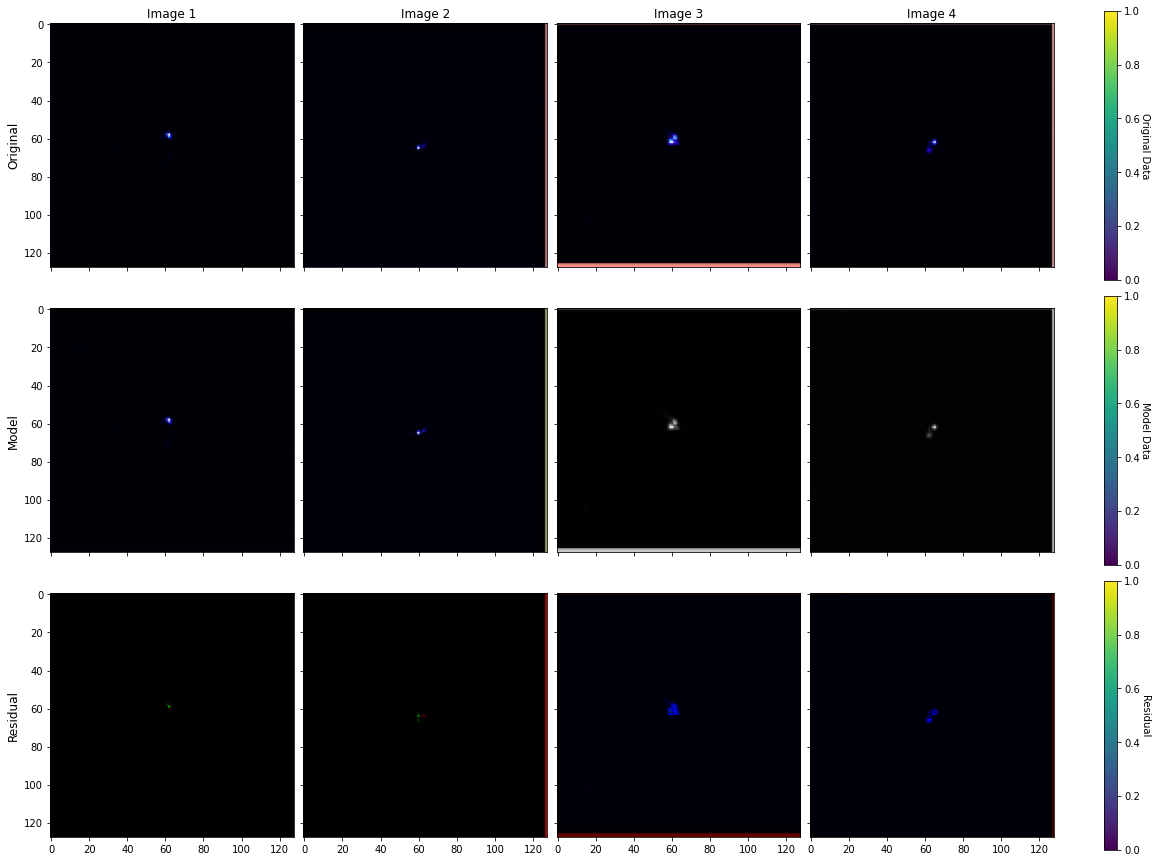

In [262]:
plot_subplotsq(original_data=od, model_data=md, residuals=res)

In [263]:
# idx =0
# plt.imshow(model_data[idx])
# plt.colorbar()

In [ ]:
coeffs = 
fig, ax = plt.subplots(1,4, figsize=(20,4), dpi=100)
c=0
for k in range(4):
    ax[c].semilogy(range(coeffs.shape[-1]), sorted(coeffs[i,j,:], reverse=True), 'o-', mfc='None', markersize=5)
				

In [98]:
128* 128,

(16384,)

In [112]:
np.sum(S > 1e-2)

30

In [114]:
S.shape

(10, 3)

In [115]:
S

array([[2785.53543662, 1270.71057617,  222.43192877],
       [1722.17837919,  243.26361277,   22.61514908],
       [3118.25426604, 1316.36157356,   80.05335691],
       [2233.30374103, 1040.41027459,  188.22821474],
       [3174.52587388, 1350.16123392,  117.87755729],
       [3163.50872451, 1425.81547372,  173.30835186],
       [3536.07509956, 1346.76141189,  140.98790628],
       [3978.20027141, 1414.61625184,  218.03775035],
       [2578.5368472 , 1229.48105601,   78.64515588],
       [1777.96723802,  331.31158392,   58.19050501]])

In [1]:
import numpy as np
import emcee
from sklearn.base import BaseEstimator, RegressorMixin, clone
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import corner

class BayesianStackingEnsemble(BaseEstimator, RegressorMixin):
    def __init__(self, base_models, param_grids, meta_model=None, n_walkers=50, n_steps=1000):
        self.base_models = base_models
        self.param_grids = param_grids
        self.meta_model = meta_model
        self.n_walkers = n_walkers
        self.n_steps = n_steps
        self.trained_base_models = []
        self.trained_meta_model = None
        self.weights_ = None
        self.sampler = None

    def fit(self, X, y):
        # Train base models with hyperparameter tuning
        for model, param_grid in zip(self.base_models, self.param_grids):
            grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
            grid_search.fit(X, y)
            self.trained_base_models.append(grid_search.best_estimator_)
        
        # Create predictions matrix
        base_predictions = np.column_stack([model.predict_proba(X)[:, 1] for model in self.trained_base_models])
        
        if self.meta_model:
            # Train meta-learner
            self.trained_meta_model = clone(self.meta_model)
            self.trained_meta_model.fit(base_predictions, y)
        else:
            # Define prior
            def log_prior(theta):
                if np.any(theta < 0):
                    return -np.inf
                if np.sum(theta) != 1:
                    return -np.inf
                return 0  # Uniform prior over the simplex

            # Define likelihood
            def log_likelihood(theta, y, predictions):
                pred = np.dot(predictions, theta)
                return -0.5 * np.sum((y - pred)**2)

            # Define posterior
            def log_posterior(theta, y, predictions):
                lp = log_prior(theta)
                if not np.isfinite(lp):
                    return -np.inf
                return lp + log_likelihood(theta, y, predictions)

            # Initialize walkers
            n_dim = len(self.base_models)
            initial_pos = np.random.rand(self.n_walkers, n_dim)
            initial_pos /= initial_pos.sum(axis=1)[:, None]  # Normalize to the simplex

            # Run MCMC
            self.sampler = emcee.EnsembleSampler(self.n_walkers, n_dim, log_posterior, args=(y, base_predictions))
            self.sampler.run_mcmc(initial_pos, self.n_steps, progress=True)
            samples = self.sampler.get_chain(discard=100, thin=15, flat=True)

            # Take the mean of the posterior samples as the weights
            self.weights_ = np.mean(samples, axis=0)

    def predict(self, X):
        base_predictions = np.column_stack([model.predict_proba(X)[:, 1] for model in self.trained_base_models])
        if self.trained_meta_model:
            return self.trained_meta_model.predict(base_predictions)
        else:
            return np.dot(base_predictions, self.weights_)

    def score(self, X, y):
        return -mean_squared_error(y, self.predict(X))

    def plot_traces(self):
        if self.sampler is None:
            raise RuntimeError("The MCMC sampler has not been run.")
        fig, axes = plt.subplots(len(self.base_models), figsize=(10, 7), sharex=True)
        samples = self.sampler.get_chain()
        labels = [f'Weight {i}' for i in range(samples.shape[-1])]
        for i in range(samples.shape[-1]):
            ax = axes[i]
            ax.plot(samples[:, :, i], "k", alpha=0.3)
            ax.set_xlim(0, samples.shape[0])
            ax.set_ylabel(labels[i])
            ax.yaxis.set_label_coords(-0.1, 0.5)
        axes[-1].set_xlabel("Step number")
        plt.show()

    def plot_corner(self):
        if self.sampler is None:
            raise RuntimeError("The MCMC sampler has not been run.")
        samples = self.sampler.get_chain(discard=100, thin=15, flat=True)
        fig = corner.corner(samples, labels=[f'Weight {i}' for i in range(samples.shape[1])])
        plt.show()

# Example usage:
from sklearn.datasets import load_breast_cancer

# Load example data
data = load_breast_cancer()
X = data.data
y = data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base models and their parameter grids
base_models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(probability=True),
    MLPClassifier(),
    GaussianNB(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss')
]

param_grids = [
    {'C': [0.1, 1, 10, 100]},
    {'n_neighbors': [3, 5, 7, 9]},
    {'max_depth': [3, 5, 7, 9]},
    {'n_estimators': [50, 100, 200]},
    {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'alpha': [0.0001, 0.001]},
    {},
    {'n_estimators': [50, 100, 200]}
]

# Initialize and train Bayesian Stacking Ensemble with a linear regression meta-learner
meta_model = LinearRegression()
bse = BayesianStackingEnsemble(base_models, param_grids, meta_model=meta_model)
bse.fit(X_train, y_train)

# Make predictions and evaluate
predictions = bse.predict(X_test)
print(f"Mean Squared Error: {bse.score(X_test, y_test)}")

# Plot trace and corner plots
bse.plot_traces()
bse.plot_corner()


/Users/admin/env/lib/python3.8/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/admin/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/admin/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations

/Users/admin/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/admin/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Mean Squared Error: -0.035502501312536565


RuntimeError: The MCMC sampler has not been run.